# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用 Sarsa 进行迷宫挑战

## 挑战介绍

在基于价值的强化学习中我们主要实现了 Q-Learning 算法，事实上 Sarsa 算法和 Q-Learning 最大的区别就在于 Q-Table 的更新，本次实验，结合实验中 Q-Learning 的算法实现，并根据 Sarsa 的算法流程来完成迷宫挑战。

## 挑战知识点

- 基于价值的强化学习原理及实现
- Sarsa 算法的 Q-Table 更新

---

## Q-Table 初始化

**<font color='red'>挑战</font>**：从实验中学习到不论是 Q-Learning 还是 Sarsa，他们的核心都是 Q-Table ，首先对 Q-Table 进行初始化。 

**<font color='brown'>要求</font>**：构造一个 $16*4$ 的 DataFrame 表（16 个 state，4 个 action）作为 Q-Table。

**<font color='green'>提示</font>**：和实验中 Q-Learning 初始化方式相同。

In [1]:
import numpy as np
import pandas as pd
import time
from IPython import display

def init_q_table():
    
    #### 代码开始 ####  (≈ 2 行代码)  
    actions = np.array(['up','down','left','right'])
    q_table = pd.DataFrame(np.zeros((16, len(actions))), columns=actions) #初始化 Q-Table 全为0
    #### 代码结束 ####
    
    return q_table

In [2]:
init_q_table()

,up,down,left,right
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


**期望输出：**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right">
      <th></th>
      <th>up</th>
      <th>down</th>
      <th>left</th>
      <th>right</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

## 动作选择

**<font color='red'>挑战</font>**：使用 $\epsilon-greedy$ 方法根据 Q-Table 进行动作选择。 

**<font color='brown'>要求</font>**：在概率为 $epsilon$ 或 Q 值都为 0 的情况下，随机选择动作；此外，按照 Q 的最大值选择动作，并且动作用 `action` 表示。

**<font color='green'>提示</font>**：这里可能会使用 if，else 语句判断，与实验中内容相同。

In [3]:
def act_choose(state, q_table, epsilon):
    
    state_act = q_table.iloc[state,:]
    actions=np.array(['up','down','left','right'])
    
    #### 代码开始 #### (≈ 4 行代码)
    if (np.random.uniform() > epsilon or state_act.all() == 0):
        action = np.random.choice(actions)
    else:
        action = state_act.idxmax()
    #### 代码结束 #### 

    return action

**运行测试：**

In [4]:
seed = np.random.RandomState(25) # 为了保证验证结果相同引入随机数种子
a = seed.rand(16, 4)
test_q_table = pd.DataFrame(a, columns=['up', 'down', 'left', 'right'])
l = []
for s in [1, 4, 7, 12, 14]:
    l.append(act_choose(state=s, q_table=test_q_table, epsilon=1))
l

['left', 'right', 'right', 'right', 'left']

**期望输出：**

<div align="center">**`['left', 'right', 'right', 'right', 'left']`**</div>

## 行为反馈

在行为反馈中我们同样将 terminal 终点的奖励设为 `10`，将 hole 陷阱的惩罚设为 `-10`，同样为了尽快找到最短路径，每一步的惩罚为 `-1`。

In [5]:
def env_feedback(state, action,hole,terminal):
    reward = 0.
    end = 0
    a, b = state
    if action == 'up':
        a -= 1
        if a < 0:a = 0
        next_state = (a, b)  
    elif action == 'down':
        a += 1
        if a >= 4:a = 3
        next_state = (a, b)
    elif action == 'left':
        b -= 1
        if b < 0:b = 0
        next_state = (a, b)
    elif action == 'right':
        b += 1
        if b >= 4:b = 3
        next_state = (a, b)
        
    if next_state == terminal:
        reward = 10.
        end = 2
    elif next_state == hole:
        reward = -10.
        end = 1
    else:
        reward = -1.
        
    return next_state, reward, end

## Q-Table 更新

**<font color='red'>挑战</font>**：通过学习我们知道 Sarsa 的 Q-Table 的更新公式为： $Q(s_{t},a_{t})=(1-\alpha) \cdot Q(s_{t},a_{t})+\alpha \cdot (r_{t}+\gamma \cdot Q(s_{t+1},a_{t+1}))$ ，根据公式完善 Q-Table 更新函数。 

**<font color='green'>提示</font>**：结合 Q-Learning 中 Q-Table 更新函数进行修改，查看 DataFrame 特定值时使用 `.loc[]`。

In [6]:
def update_q_table(q_table,state,action,next_state,next_action,terminal,gamma,alpha,reward):

    x, y = state
    next_x, next_y = next_state
    q_original= q_table.loc[x * 4 + y, action]
    
    if next_state != terminal:
        ### 代码开始 ### (≈ 1 行代码)
        q_predict = reward + gamma * q_table.loc[next_x * 4 + next_y, next_action] # 不通过 .max() 选择
        ### 代码结束 ###
    else:
        q_predict = reward
        
    #### 代码开始 ### (≈ 1 行代码)   
    q_table.loc[x * 4 + y, action] = (1-alpha) * q_original + alpha * q_predict # 和 Q-Learning 一致
    ### 代码结束 ###
    
    return q_table

**运行测试：（仅执行一次，重复执行请重启 kernel）**

In [7]:
new_q_table = update_q_table(q_table=test_q_table,state=(2,2),action='right',
                             next_state=(2,3),next_action='down',terminal=(3,2),
                             gamma =0.9 ,alpha =0.8 ,reward=10)

new_q_table.loc[10,'right']

8.740755431411795

**期望输出：（仅执行一次得到的结果）**

<div align="center">**`8.740755431411795`**</div>

## 状态展示
同样为了展示强化学习效果，定义一个状态展示函数。

In [8]:
def show_state(end, state, episode, step, q_table):

    terminal = (3, 2)
    hole = (2, 1)
    env = np.array([['_ '] * 4] * 4)
    env[terminal] = '$ '
    env[hole] = '# '
    env[state] = 'L '
    interaction = ''
    for i in env:
        interaction += ''.join(i) + '\n'

    if state == terminal:
        message = 'EPISODE: {}, STEP: {}'.format(episode, step)
        interaction += message
        display.clear_output(wait=True)
        print(interaction)
        print("\n"+"q_table:")
        print(q_table)
        time.sleep(3)  # 在成功到终点时，等待 3 秒
    else:
        display.clear_output(wait=True)
        print(interaction)
        print("\n"+"q_table:")
        print(q_table)
        time.sleep(0.3)  # 在这里控制每走一步所需要时间

## Sarsa 算法实现

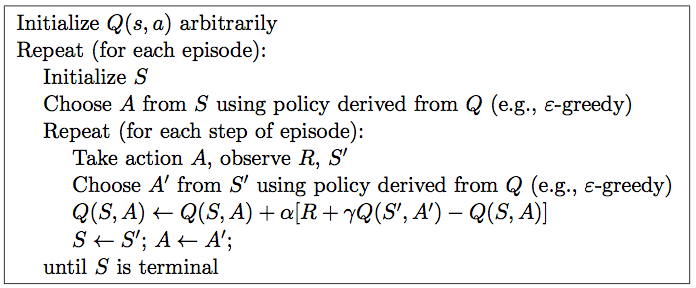

**<font color='red'>挑战</font>**：顺利完成以上几个函数后，根据算法流程实现 Sarsa 算法。 

**<font color='green'>提示</font>**：结合 Q-Learning 完成代码。

In [9]:
def sarsa(max_episodes, alpha, gamma, epsilon):
    q_table = init_q_table()
    terminal = (3, 2)
    hole = (2, 1)
    episodes = 0
    while(episodes < max_episodes):
        step = 0
        state = (0, 0)
        end = 0
        show_state(end, state, episodes, step, q_table)
        x, y = state

        # 代码开始 ### （≈ 1 行代码)
        action = act_choose(x * 4 + y, q_table, epsilon)  # 动作选择
        ### 代码结束 ###

        while(end == 0):
            next_state, reward, end = env_feedback(state, action, hole, terminal)  # 环境反馈
            next_x, next_y = next_state
            next_action = act_choose(next_x * 4 + next_y, q_table, epsilon)  # 动作选择

            # 代码开始 ### （≈ 3 行代码)
            q_table = update_q_table(
                q_table,state,action,next_state,next_action,terminal,gamma,alpha,reward)  # q-table 更新
            state = next_state
            action = next_action
            ### 代码结束 ###

            step += 1
            show_state(end, state, episodes, step, q_table)
        if end == 2:
            episodes += 1

In [10]:
sarsa(max_episodes = 20, alpha = 0.8, gamma = 0.9, epsilon = 0.9)

_ _ _ _ 
_ _ _ _ 
_ # _ _ 
_ _ L _ 
EPISODE: 19, STEP: 13

q_table:
          up       down      left     right
0  -5.983978  -5.447676 -5.014695 -3.217556
1  -3.630029  -3.485344 -3.642927 -3.484472
2  -2.993494   2.280013 -3.206195 -3.391426
3  -2.286848  -2.374375 -3.507846 -2.880911
4  -1.197637  -6.782720 -3.545806 -3.386437
5  -3.205645  -9.600000 -3.571239 -5.068251
6  -2.462874   7.409664 -2.962098  4.570757
7  -2.791380   6.199998 -2.227200  3.302486
8  -1.491200   0.000000 -9.484800 -9.984000
9   0.000000   0.000000  0.000000  0.000000
10 -1.873664  10.000000 -9.600000 -1.376000
11  0.642392   0.038400  8.000000  0.026368
12  0.000000   0.000000  0.000000  0.000000
13  0.000000   0.000000  0.000000  0.000000
14  0.000000   0.000000  0.000000  0.000000
15  0.000000   0.000000  9.984000  6.182400


**参考输出：**

<pre>_ _ _ _ 
_ _ _ _ 
_ # _ _ 
_ _ L _ 
EPISODE: 19, STEP: 5

q_table:
          up       down      left     right
0  -4.421534  -3.457078 -3.936450 -4.152483
1  -3.409185  -9.062400 -3.433181 -3.596441
2  -2.213120   4.590499 -3.514029 -3.414613
3  -1.536000  -1.574400 -2.908418 -3.936450
4  -4.109114  -2.730086 -2.836070 -2.548000
5  -2.836070  -9.984000 -2.065920 -1.720000
6  -2.850867   8.000000 -2.562662 -0.800000
7  -2.342144  -0.800000 -1.982720  0.000000
8  -2.509531  -2.348544 -2.213120 -8.000000
9   0.000000   0.000000  0.000000  0.000000
10 -3.033926  10.000000 -8.000000 -0.800000
11 -2.844488   0.000000  0.000000 -0.800000
12 -2.766862  -1.536000 -1.536000  6.142464
13  0.000000   0.000000 -2.325504  9.600000
14  0.000000   0.000000  0.000000  0.000000
15  0.000000   0.000000  0.000000  0.000000
</pre>

注：由于 `q_table` 的值是随机的，上面的实验结果仅供参考。只要机器在环境中移动，随着迭代次数的增加，走的步数变少，最终接近 5 步即可。 

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>